>>> ## Deep Learning - "CNN + MNIST"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split


In [ ]:
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
from keras.layers import Dense
from keras.utils import to_categorical, plot_model

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

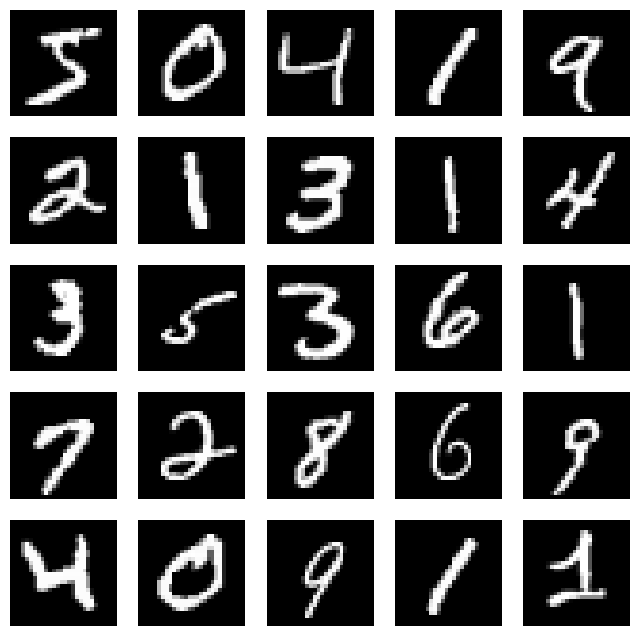

In [ ]:
def show_img(img):
    plt.imshow(img)
    plt.axis("off")
def show_img_grid(img):
    plt.figure(figsize=(8, 8))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i], cmap="gray")
        plt.axis("off")
    plt.show()

show_img_grid(xtrain)

In [ ]:
X_train = xtrain.reshape((xtrain.shape[0], 28* 28)).astype("float32") / 255
X_test = xtest.reshape((xtest.shape[0], 28*28)).astype("float32") / 255
#X_valid = Xvalid.reshape((Xvalid.shape[0], 28 * 28)).astype("float32") / 255

In [ ]:
print(X_train.shape)
#print(X_valid.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(np.unique(ytrain))
#print(np.unique(yvalid))
print(np.unique(ytest))
print(ytrain.shape)
#print(yvalid.shape)
print(ytest.shape)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
(60000,)
(10000,)


In [ ]:
y_train = to_categorical(ytrain)
#y_valid = to_categorical(yvalid)
y_test = to_categorical(ytest)

print(np.unique(y_train))
#print(np.unique(y_valid))
print(np.unique(y_test))
print(y_train.shape)
#print(y_valid.shape)
print(y_test.shape)

[0. 1.]
[0. 1.]
(60000, 10)
(10000, 10)


In [ ]:
def dense_mpl_model():
    neuron_size = 128
    neuron_out  = 10
    model = keras.Sequential()
    model.add(Dense(neuron_size, activation="relu", input_shape=(X_train.shape[1], )))
    model.add(Dense(neuron_size, activation="relu"))
    model.add(Dense(neuron_out, activation="softmax"))
    #model.summary()
    model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    return model

In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = [], []
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_idx, test_idx in kfold.split(dataX):
        model = dense_mpl_model()
        trainX, trainY, testX, testY = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]
        history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [ ]:
def plot_summary_model(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(10, 10))
        plt.subplot(2, 1, 1)
        plt.title('Loss')
        plt.plot(histories[i].history['loss'], color='green', label='train')
        plt.plot(histories[i].history['val_loss'], color='blue', label='test')

        plt.subplot(2, 1, 2)
        plt.title('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', label='test')
        plt.show()

In [ ]:
scores, histories = evaluate_model(X_train, y_train)

Epoch 1/10


2024-02-29 22:00:42.116100: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 [==============================] - 2s 2ms/step - loss: 0.2876 - accuracy: 0.9162 - val_loss: 0.1574 - val_accuracy: 0.9538
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1212 - accuracy: 0.9637 - val_loss: 0.1503 - val_accuracy: 0.9553
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0830 - accuracy: 0.9743 - val_loss: 0.0970 - val_accuracy: 0.9717
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0624 - accuracy: 0.9803 - val_loss: 0.1106 - val_accuracy: 0.9677
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0970 - val_accuracy: 0.9732
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.1010 - val_accuracy: 0.9727
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.1070 - val_accuracy: 0.9747
Epoch 8/10
750/75

2024-02-29 22:01:00.201442: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 [==============================] - 2s 3ms/step - loss: 0.2845 - accuracy: 0.9161 - val_loss: 0.1678 - val_accuracy: 0.9482
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1214 - accuracy: 0.9632 - val_loss: 0.1236 - val_accuracy: 0.9628
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0994 - val_accuracy: 0.9708
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0942 - val_accuracy: 0.9712
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0959 - val_accuracy: 0.9726
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0984 - val_accuracy: 0.9736
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.1000 - val_accuracy: 0.9741
Epoch 8/10
750/75

2024-02-29 22:01:19.438997: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 [==============================] - 2s 3ms/step - loss: 0.2797 - accuracy: 0.9171 - val_loss: 0.1841 - val_accuracy: 0.9456
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1164 - accuracy: 0.9637 - val_loss: 0.1242 - val_accuracy: 0.9632
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0825 - accuracy: 0.9751 - val_loss: 0.1062 - val_accuracy: 0.9690
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 0.1000 - val_accuracy: 0.9722
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.1048 - val_accuracy: 0.9733
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0984 - val_accuracy: 0.9745
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.1102 - val_accuracy: 0.9728
Epoch 8/10
750/75

2024-02-29 22:01:38.779860: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 [==============================] - 2s 2ms/step - loss: 0.2833 - accuracy: 0.9167 - val_loss: 0.1500 - val_accuracy: 0.9533
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1218 - accuracy: 0.9632 - val_loss: 0.1026 - val_accuracy: 0.9681
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0851 - accuracy: 0.9739 - val_loss: 0.0901 - val_accuracy: 0.9726
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.1030 - val_accuracy: 0.9704
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0943 - val_accuracy: 0.9742
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0422 - accuracy: 0.9873 - val_loss: 0.0802 - val_accuracy: 0.9790
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.0822 - val_accuracy: 0.9787
Epoch 8/10
750/75

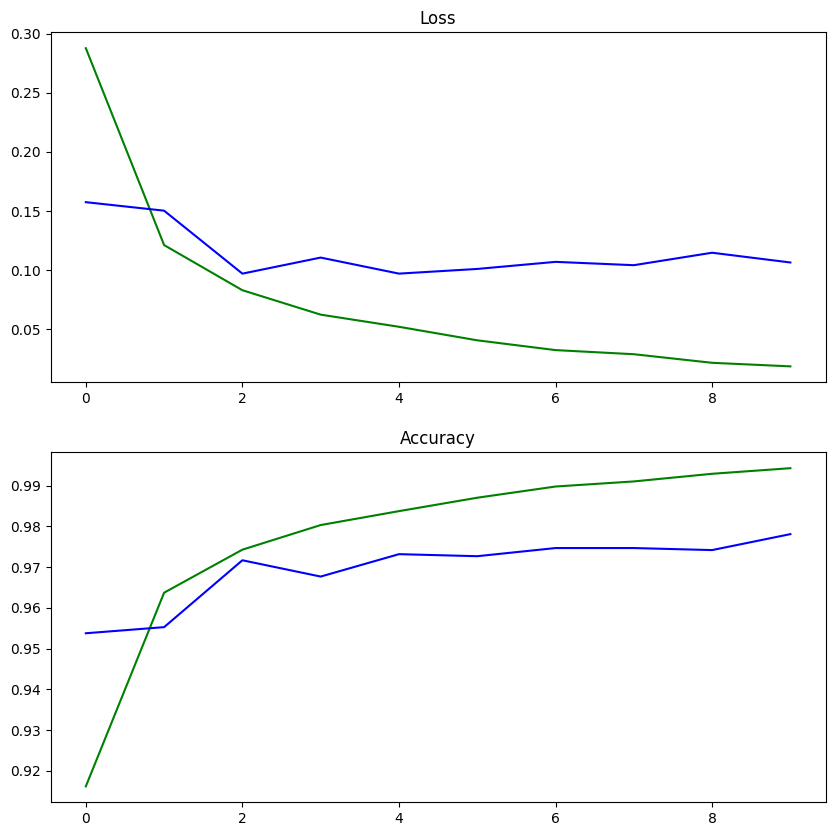

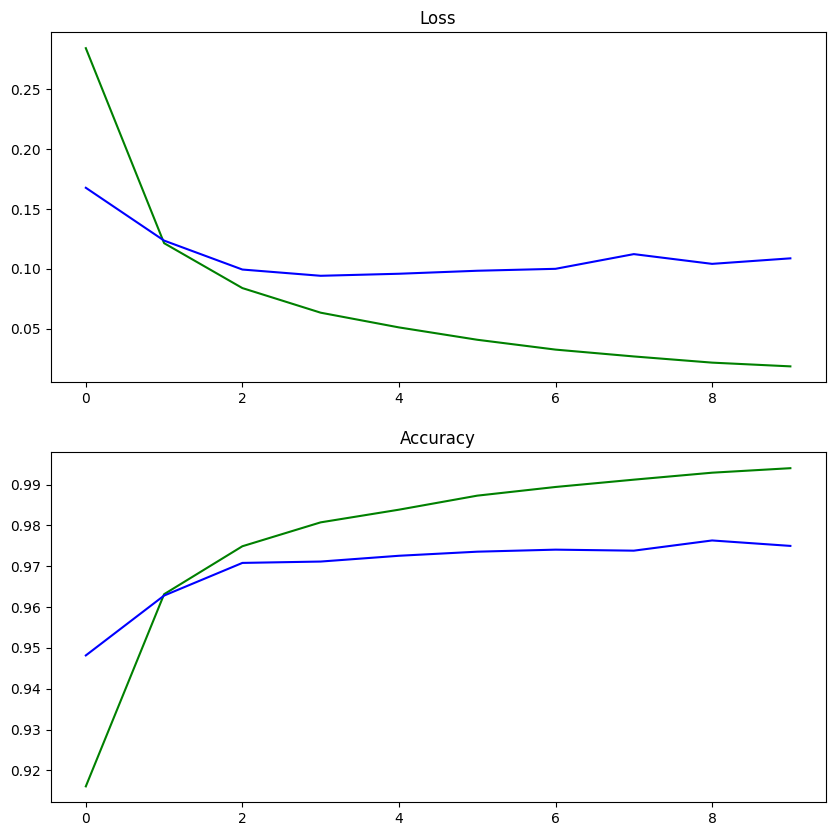

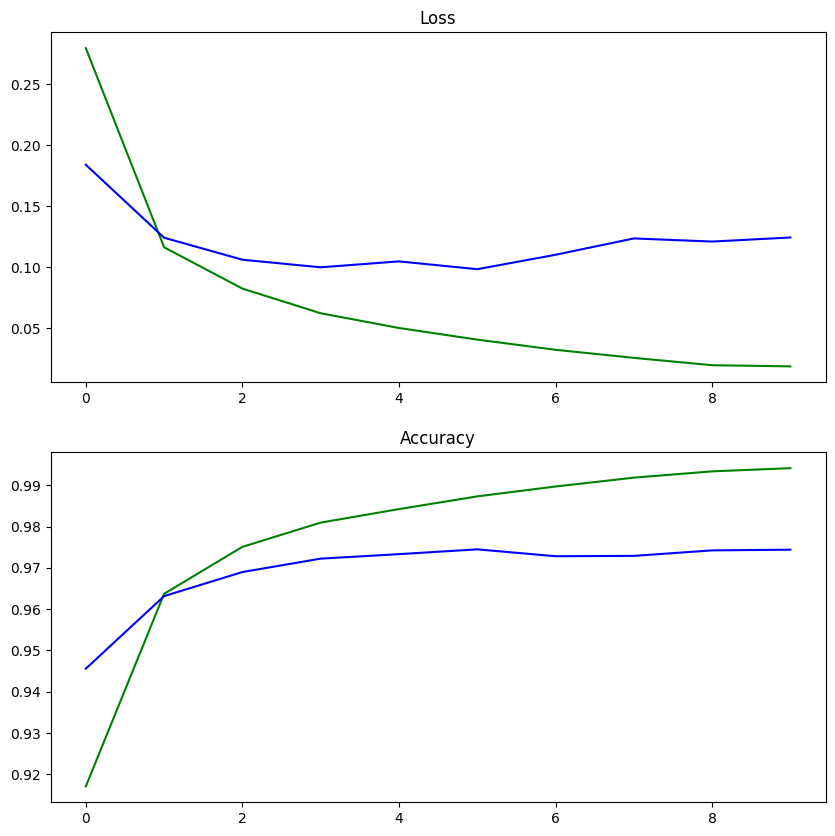

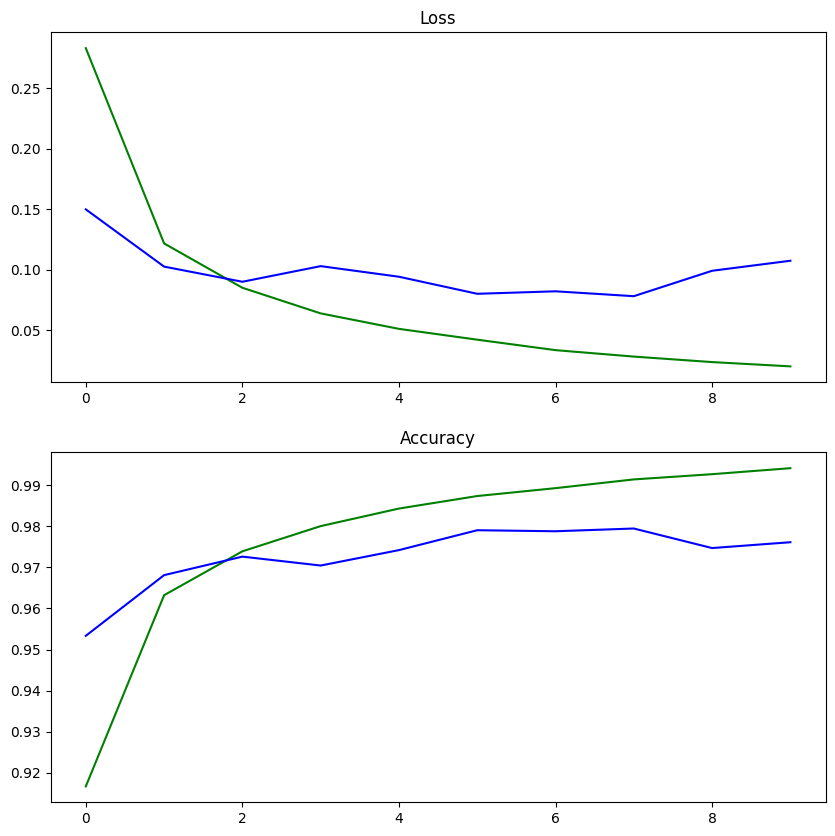

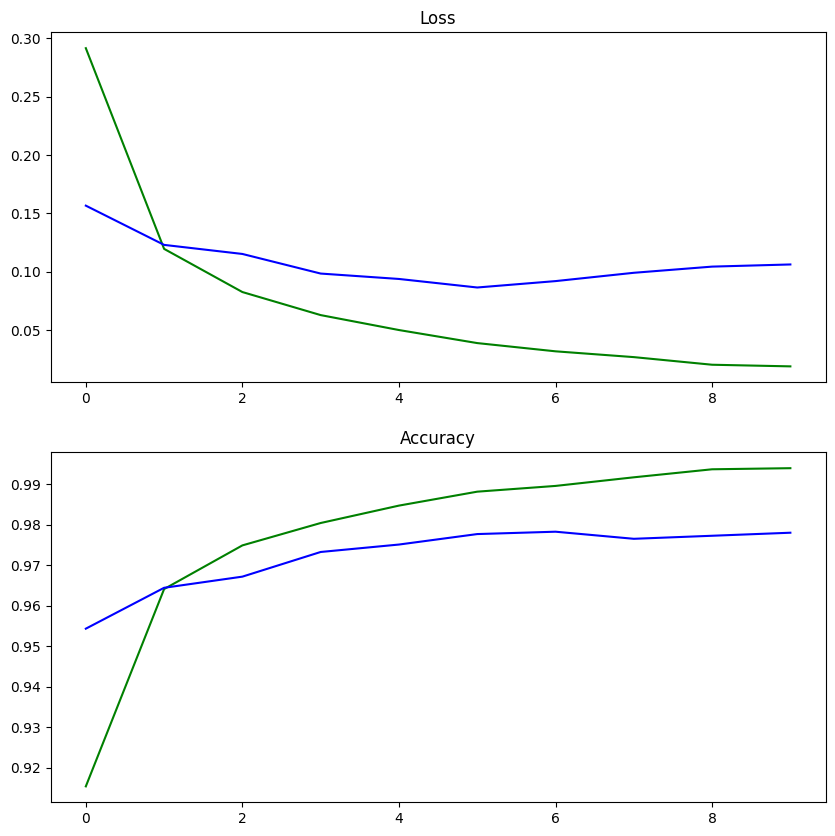

In [ ]:
plot_summary_model(histories)

> ## CNN para MNIST

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
X_train = xtrain.reshape((xtrain.shape[0], 28,  28)).astype("float32") / 255
X_test = xtest.reshape((xtest.shape[0], 28,  28)).astype("float32") / 255

In [ ]:
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [ ]:
def cnn_model():
    model = keras.Sequential()
    model.add(Conv2D(6, (3, 3), kernel_initializer='he_uniform', activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    #model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(Conv2D(10, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(80, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def evaluate_model_cnn(dataX, dataY, n_folds=5, batch_size=64):
    scores, histories = [], []
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_idx, test_idx in kfold.split(dataX):
        model = cnn_model()
        trainX, trainY, testX, testY = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]
        history = model.fit(trainX, trainY,
                            epochs=10,
                            batch_size=batch_size,
                            validation_data=(testX, testY))
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
scores, histories = evaluate_model_cnn(X_train, y_train)

Epoch 1/10
750/750 [==============================] - 16s 18ms/step - loss: 0.2655 - accuracy: 0.9183 - val_loss: 0.1245 - val_accuracy: 0.9597
Epoch 2/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0922 - accuracy: 0.9703 - val_loss: 0.0802 - val_accuracy: 0.9743
Epoch 3/10
750/750 [==============================] - 13s 18ms/step - loss: 0.0629 - accuracy: 0.9804 - val_loss: 0.0950 - val_accuracy: 0.9692
Epoch 4/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.0625 - val_accuracy: 0.9817
Epoch 5/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0394 - accuracy: 0.9869 - val_loss: 0.0580 - val_accuracy: 0.9828
Epoch 6/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0329 - accuracy: 0.9888 - val_loss: 0.0642 - val_accuracy: 0.9806
Epoch 7/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 0.0571 - val_accuracy:

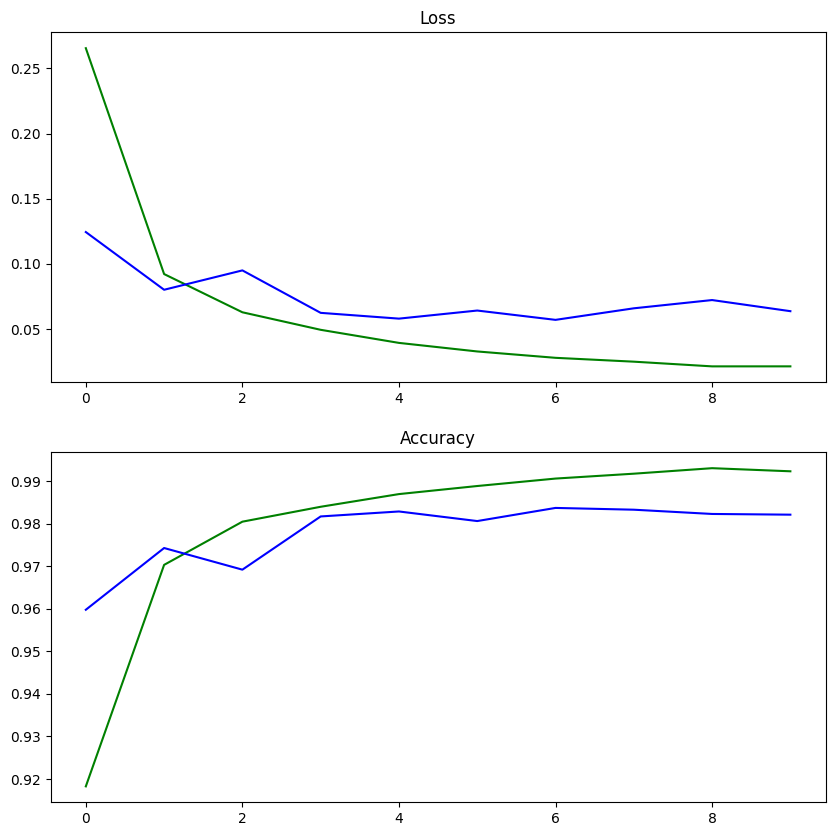

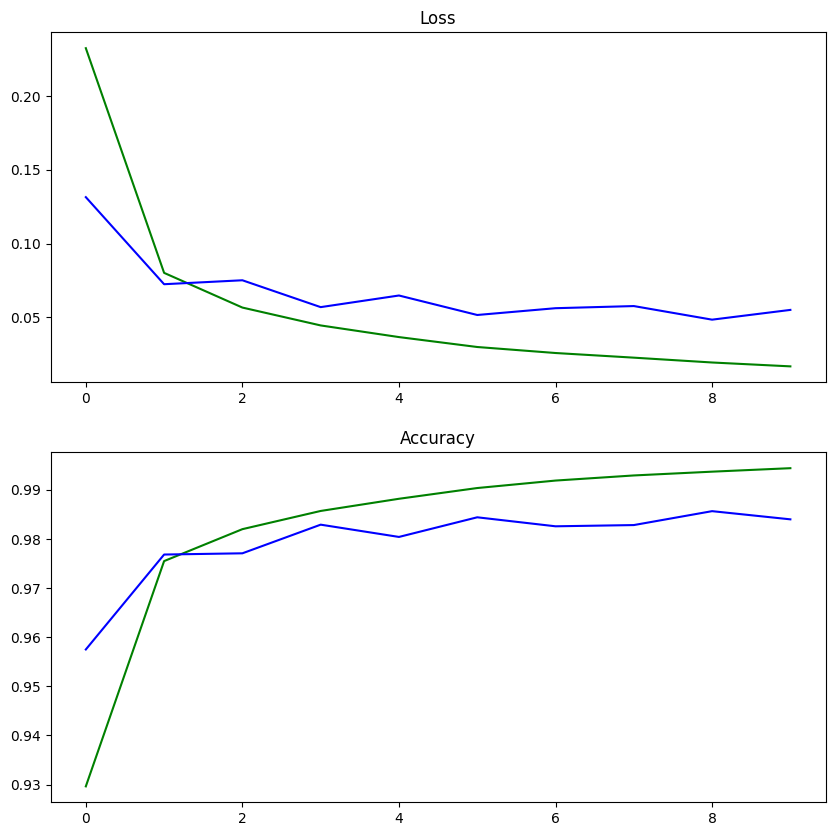

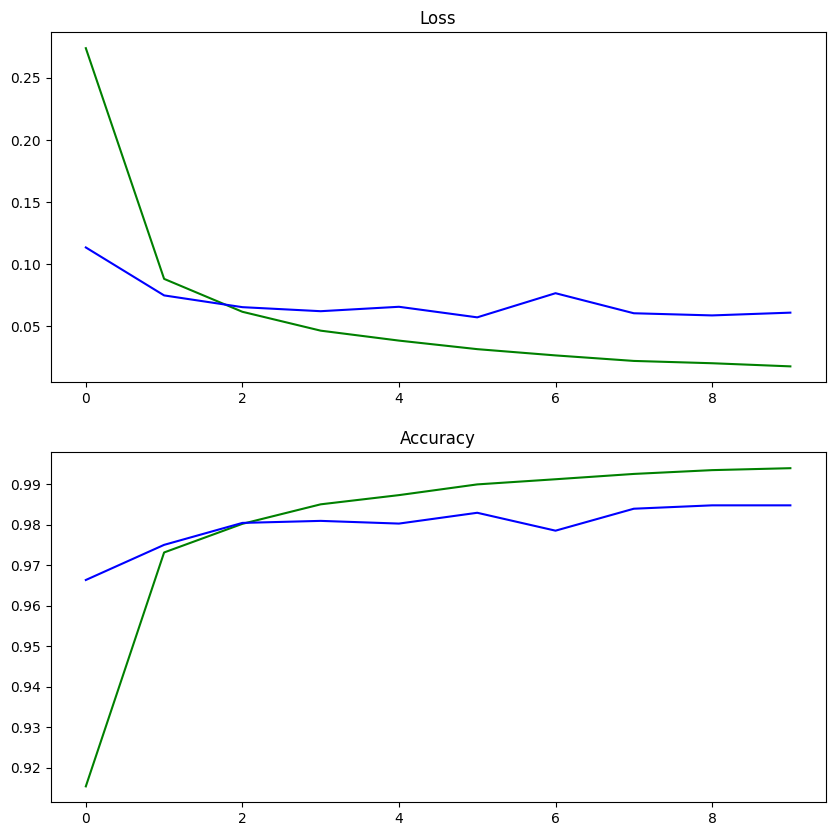

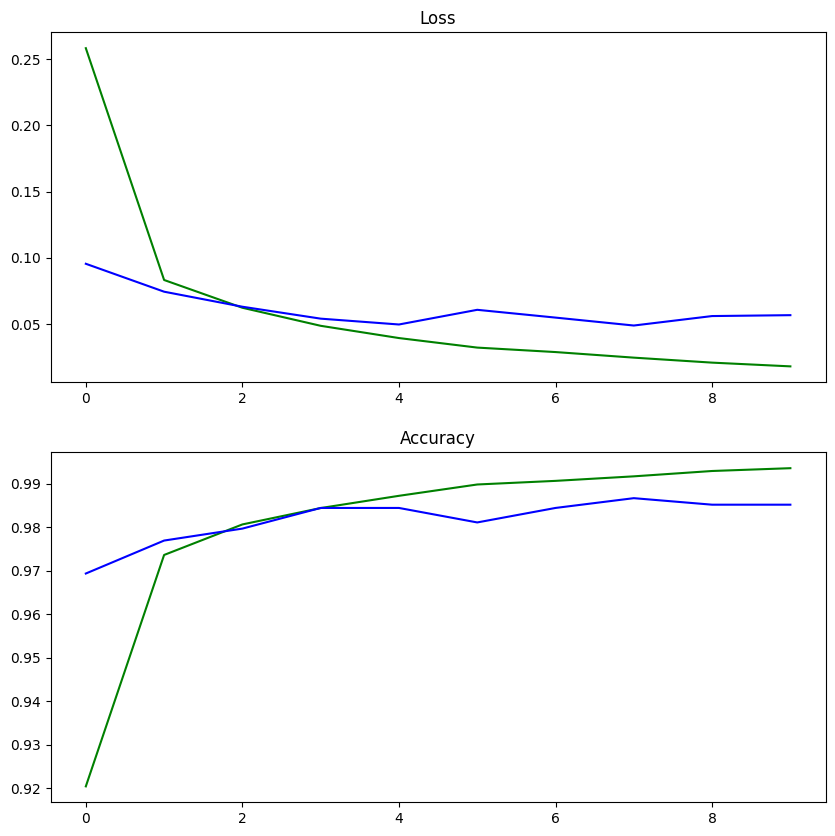

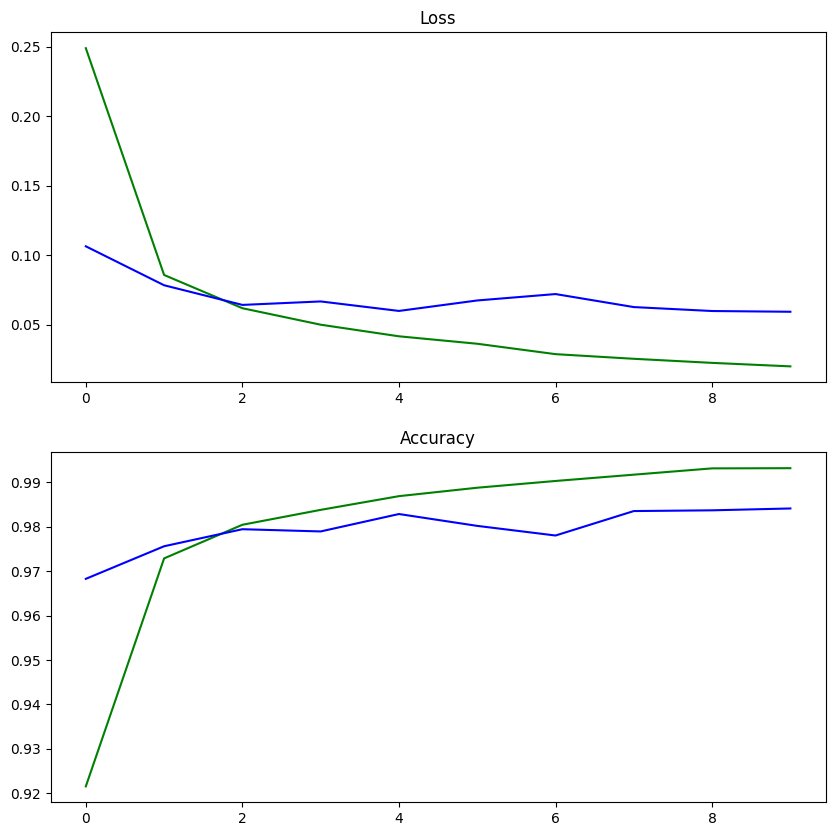

In [ ]:
plot_summary_model(histories)

In [ ]:
X_train = xtrain.reshape((xtrain.shape[0], 28,  28, 1)).astype("float32") / 255
X_test = xtest.reshape((xtest.shape[0], 28,  28, 1)).astype("float32") / 255

In [ ]:
X_train = np.concatenate([X_train] * 3, axis=-1)
X_test = np.concatenate([X_test] * 3, axis=-1)

In [ ]:
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [ ]:
def translearn_model():
    pretrained_model = tf.keras.applications.VGG16(weights='imagenet',
                                                   include_top=False,
                                                   input_shape=(28, 28, 1))

    pretrained_model.trainable = False

    model = keras.models.Sequential()
    model.add(keras.layers.UpSampling2D((2, 2)))
    model.add(pretrained_model)
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
def evaluate_model_learn(dataX, dataY, n_folds=5, batch_size=64):
    scores, histories = [], []
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_idx, test_idx in kfold.split(dataX):
        model = translearn_model()
        trainX, trainY, testX, testY = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]
        history = model.fit(trainX, trainY,
                            epochs=5,
                            batch_size=batch_size,
                            validation_data=(testX, testY))
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [ ]:
scores, histories = evaluate_model_learn(X_train, y_train, n_folds=10)